# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(city_weather)
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | broken hill
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | at taj
Processing Record 6 of Set 1 | trincomalee
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | cannonvale
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | vadso
Processing Record 12 of Set 1 | hihifo
City not found. Skipping...
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | irtyshsk
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | tolanaro
Processing Record 21 of Set 1 | alesund
Processing Record 22 of Set 1

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [16]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,87.75,49,59,13.65,US,1685225386
1,broken hill,-31.9500,141.4333,48.18,69,65,10.27,AU,1685225386
2,olonkinbyen,70.9221,-8.7187,31.01,72,54,15.88,SJ,1685225387
3,port-aux-francais,-49.3500,70.2167,41.47,87,100,32.91,TF,1685225387
4,at taj,24.2049,23.2857,74.98,36,0,17.81,LY,1685225387


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,87.75,49,59,13.65,US,1685225386
1,broken hill,-31.9500,141.4333,48.18,69,65,10.27,AU,1685225386
2,olonkinbyen,70.9221,-8.7187,31.01,72,54,15.88,SJ,1685225387
3,port-aux-francais,-49.3500,70.2167,41.47,87,100,32.91,TF,1685225387
4,at taj,24.2049,23.2857,74.98,36,0,17.81,LY,1685225387


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

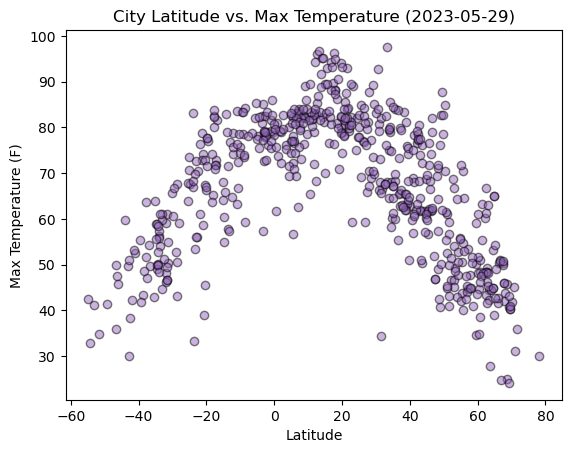

In [74]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x, y, marker="o", alpha=0.5, edgecolors="black", facecolor="C4")

# Incorporate the other graph properties
# Need to add 'date' to the title, but also convert it to "YYY-MM-DD" format
conv_date = time.strftime("%Y-%m-%d")
# print(conv_date)

plt.title(f"City Latitude vs. Max Temperature ({conv_date})")
plt.xlabel("Latitude")
# Need to verify what UoM the Temps are measured in.. will show F, Needs to be C for this Challenge
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

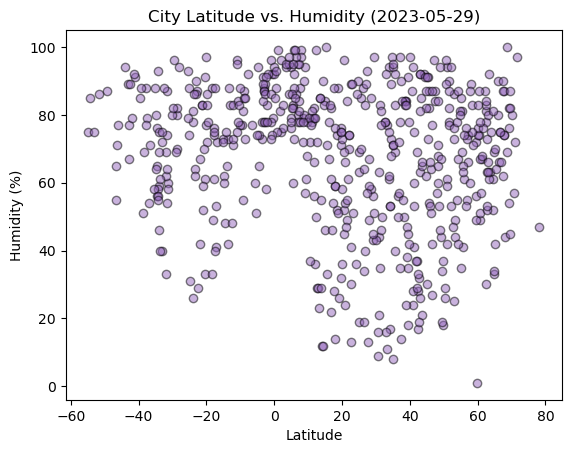

In [75]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']

plt.scatter(x, y, marker="o", alpha=0.5, edgecolors="black", facecolor="C4")

# Incorporate the other graph properties
# Need to add 'date' to the title, but also convert it to "YYY-MM-DD" format
conv_date = time.strftime("%Y-%m-%d")

plt.title(f"City Latitude vs. Humidity ({conv_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

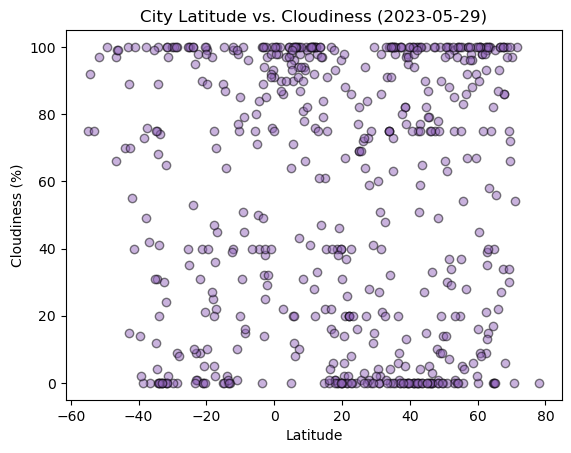

In [76]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

plt.scatter(x, y, marker="o", alpha=0.5, edgecolors="black", facecolor="C4")

# Incorporate the other graph properties
# Need to add 'date' to the title, but also convert it to "YYY-MM-DD" format
conv_date = time.strftime("%Y-%m-%d")

plt.title(f"City Latitude vs. Cloudiness ({conv_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

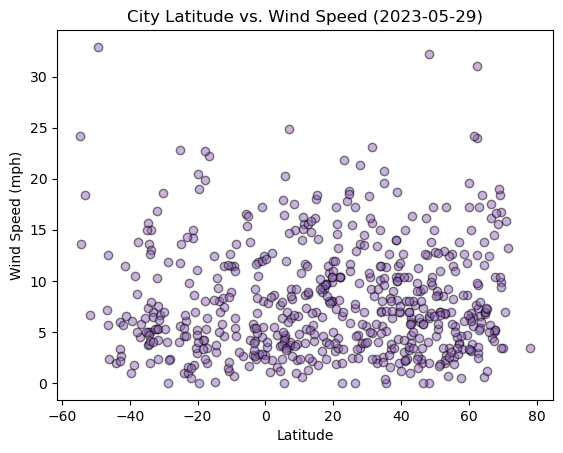

In [84]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']

plt.scatter(x, y, marker="o", alpha=0.5, edgecolors="black", facecolor="C4")

# Incorporate the other graph properties
# Need to add 'date' to the title, but also convert it to "YYY-MM-DD" format
conv_date = time.strftime("%Y-%m-%d")

plt.title(f"City Latitude vs. Wind Speed ({conv_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
line_eq_coor = (-10,40)
y_tag = "Max Temp"

# Establish a linear regression functions using variables above
def northern_hemi_plot(x_values, y_values, line_eq_coor, y_tag):
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Setup scatter plot: facecolor will be "b" for Northern Hemisphere
    plt.scatter(x_values, y_values, marker="o", alpha=0.25, edgecolors="black", facecolor="b")
    # plot and annotate regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(line_eq_coor), fontsize=15, color="red")

    # calculate & print the R square value
    r_squared = rvalue ** 2
    print(f"The r-squared value is: {r_squared}")

    # chart labels
    plt.title(f"Northern Hemisphere Latitude vs {y_tag} ({conv_date})")
    plt.xlabel("Latitude")
    plt.ylabel(y_tag)

    # Display chart
    plt.show

def southern_hemi_plot(x_values, y_values, line_eq_coor, y_tag):
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Setup scatter plot: facecolor will be "m" for Southern Hemisphere
    plt.scatter(x_values, y_values, marker="o", alpha=0.25, edgecolors="black", facecolor="m")
    # plot and annotate regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(line_eq_coor), fontsize=15, color="red")

    # calculate & print the R square value
    r_squared = rvalue ** 2
    print(f"The r-squared value is: {r_squared}")

    # chart labels
    plt.title(f"Southern Hemisphere Latitude vs {y_tag} ({conv_date})")
    plt.xlabel("Latitude")
    plt.ylabel(y_tag)

    # Display chart
    plt.show

# testing N and S hemi functions
# southern_hemi_plot(x_values, y_values, line_eq_coor, y_tag)

# Creating two separate functions to better distinguish between..
# the Northern and Sourthen Hemispheres when comparing
# line_eq_coor variable will allow user to position line_eg on the chart at cell (data dependendent)
# y_tag variable allows user to change both the y axis label and chart title in one location


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()
# northern_hemi_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,87.75,49,59,13.65,US,1685225386
2,olonkinbyen,70.9221,-8.7187,31.01,72,54,15.88,SJ,1685225387
4,at taj,24.2049,23.2857,74.98,36,0,17.81,LY,1685225387
5,trincomalee,8.5711,81.2335,82.27,79,81,17.56,LK,1685225388
7,dudinka,69.4058,86.1778,40.62,82,30,16.75,RU,1685225388


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()
# southern_hemi_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,broken hill,-31.9500,141.4333,48.18,69,65,10.27,AU,1685225386
3,port-aux-francais,-49.3500,70.2167,41.47,87,100,32.91,TF,1685225387
6,blackmans bay,-43.0167,147.3167,49.73,89,100,3.31,AU,1685225388
8,cannonvale,-20.2833,148.7000,67.39,61,21,11.05,AU,1685225388
9,waitangi,-43.9535,-176.5597,59.83,94,70,1.99,NZ,1685225389


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.6168547292863387


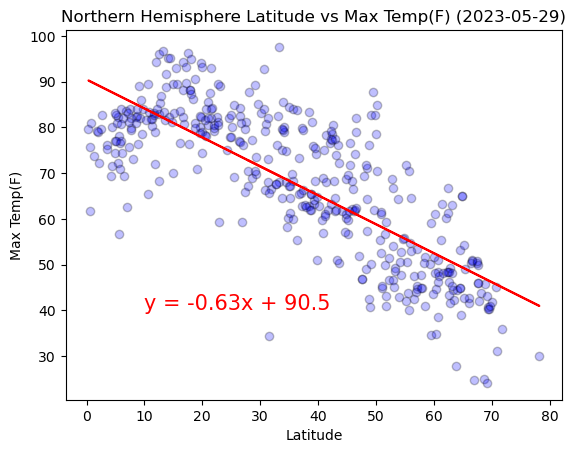

In [78]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
line_eq_coor = (10,40)
y_tag = "Max Temp(F)"

# insert linear regression functions for the Northern Hemisphere
northern_hemi_plot(x_values, y_values, line_eq_coor, y_tag)

# Save the figure
plt.savefig("output_data/linreg1.png")


The r-squared value is: 0.6713350772852893


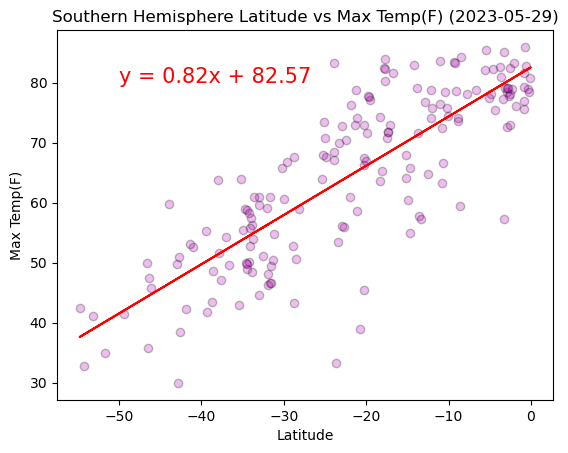

In [79]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
line_eq_coor = (-50,80)
y_tag = "Max Temp(F)"

# insert linear regression functions for the Southern Hemisphere
southern_hemi_plot(x_values, y_values, line_eq_coor, y_tag)

# Save the figure
plt.savefig("output_data/linreg2.png")


**Discussion about the linear relationship:** Based on R-Squared value, Latitude does have an impact on Max Temperature in both the Northern and Southern Hemispheres. The R-Square values apears to be consistant at > 0.6 in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.00836340830381914


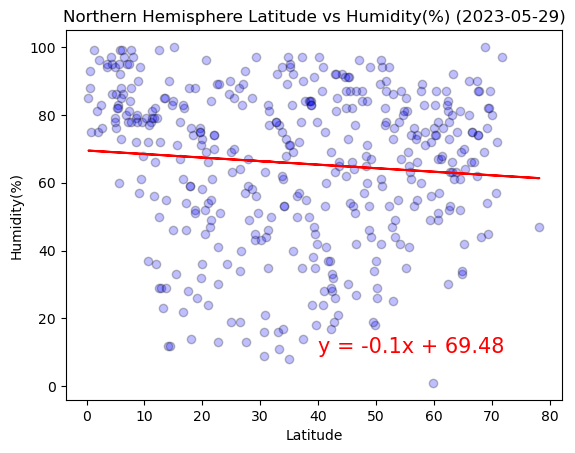

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
line_eq_coor = (40,10)
y_tag = "Humidity(%)"

# insert linear regression functions for the Northern Hemisphere
northern_hemi_plot(x_values, y_values, line_eq_coor, y_tag)

# Save the figure
plt.savefig("output_data/linreg3.png")


The r-squared value is: 0.021198097572524388


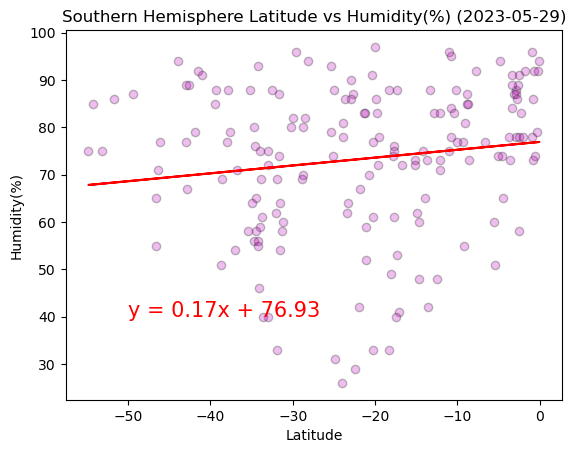

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
line_eq_coor = (-50,40)
y_tag = "Humidity(%)"

# insert linear regression functions for the Southern Hemisphere
southern_hemi_plot(x_values, y_values, line_eq_coor, y_tag)

# Save the figure
plt.savefig("output_data/linreg4.png")


**Discussion about the linear relationship:** Based on R-Squared value, Latitude has no impact on Humidity in either the Northern or Southern Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.0034441242017710398


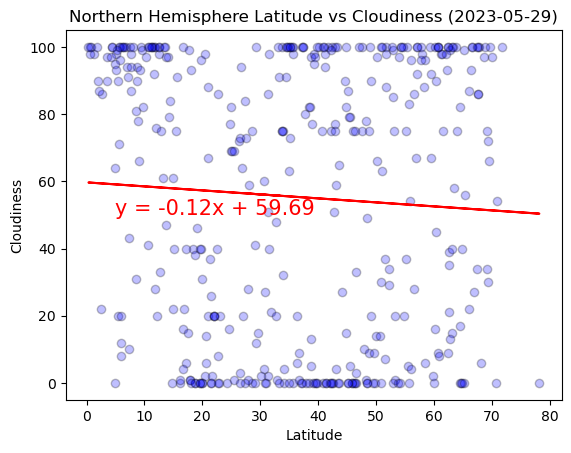

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
line_eq_coor = (5,50)
y_tag = "Cloudiness"

# insert linear regression functions for the Northern Hemisphere
northern_hemi_plot(x_values, y_values, line_eq_coor, y_tag)

# Save the figure
plt.savefig("output_data/linreg5.png")


The r-squared value is: 0.0013939355802723805


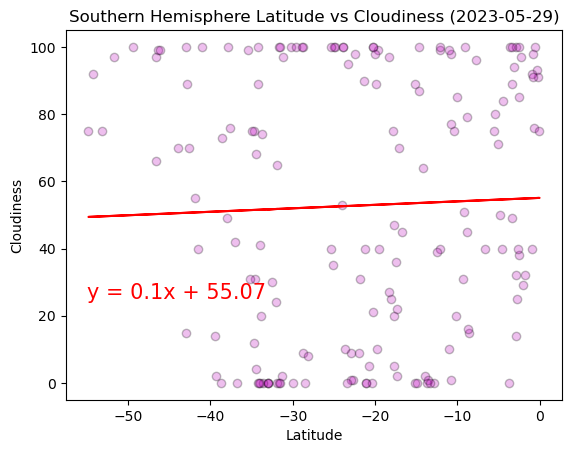

In [82]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
line_eq_coor = (-55,25)
y_tag = "Cloudiness"

# insert linear regression functions for the Southern Hemisphere
southern_hemi_plot(x_values, y_values, line_eq_coor, y_tag)

# Save the figure
plt.savefig("output_data/linreg6.png")


**Discussion about the linear relationship:** Based on R-Squared value, Latitude has no impact on Cloudiness in either the Northern or Southern Hemispheres. There seems to be, however, a similar distribution of 'low cloudiness cities' to 'high cloudiness cities' across the Northern Hemisphere latitudes, just as side observation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.001474243207922854


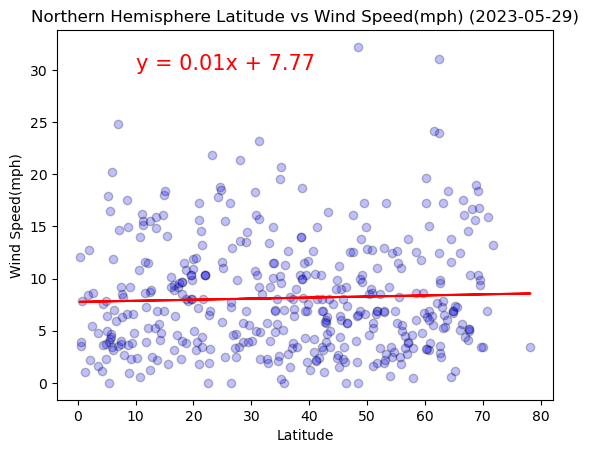

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
line_eq_coor = (10,30)
y_tag = "Wind Speed(mph)"

# insert linear regression functions for the Northern Hemisphere
northern_hemi_plot(x_values, y_values, line_eq_coor, y_tag)

# Save the figure
plt.savefig("output_data/linreg7.png")


The r-squared value is: 0.010518543581181355


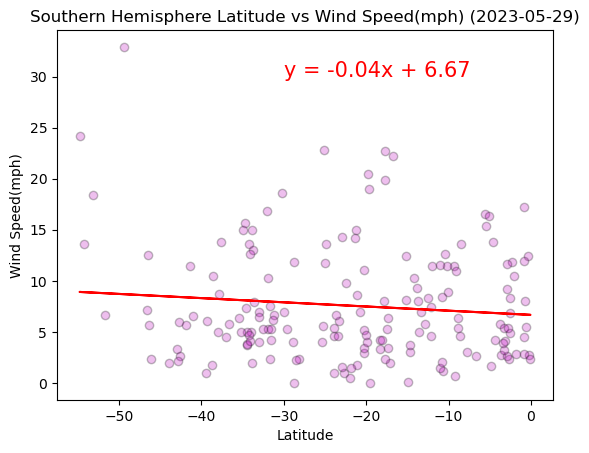

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
line_eq_coor = (-30,30)
y_tag = "Wind Speed(mph)"

# insert linear regression functions for the Southern Hemisphere
southern_hemi_plot(x_values, y_values, line_eq_coor, y_tag)

# Save the figure
plt.savefig("output_data/linreg8.png")


**Discussion about the linear relationship:**  Based on R-Squared value, Latitude has little to no impact on Wind Speed in the Northern or Southern Hemisphere.